In [230]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math

ALLOWED_NAMES = {
    k: v for k, v in np.__dict__.items() if not k.startswith("__")
}

def f(function, x, x1, x2, d1, d2):
  return eval(function, {"__builtins__": {}, "x": x, "x1": x1, "x2": x2, "d1": d1, "d2": d2}, ALLOWED_NAMES)

def goldenSectionSearch(function, a, b, x1, x2, d1, d2):
  goldenRatio = (5**(1/2) - 1) / (2)
  e = 1e-6
  time = 0
  timeout = 100
  xa, xb = 0, 0

  while time < timeout:
    d = goldenRatio * (b - a)
    xa = a + d
    xb = b - d
    fxa = f(function, xa, x1, x2, d1, d2)
    fxb = f(function, xb, x1, x2, d1, d2)

    if math.fabs(xb - xa) < e:
      break

    if fxa > fxb:
      b = xa
    elif fxb > fxa:
      a = xb

    time += 1

  return [xa, fxa]

In [231]:


def plot3D(function, min, range=5):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.set_title(f'f(x) = {function}', fontsize=10)
    x1 = np.arange(-range, range, 0.15)
    x2 = np.arange(-range, range, 0.15)
    x1, x2 = np.meshgrid(x1, x2)
    z = eval(function, {"__builtins__": {}, "x1": x1, "x2": x2}, ALLOWED_NAMES)

    ax.plot_surface(x1, x2, z, rstride=1, cstride=1, cmap='viridis', label=f'f(x) = {function}')
    
    ax.scatter(min[0], min[1], color='red', label=f'Mínimo')

def plotContour(function, min, range=5):
    fig = plt.figure()
    ax = fig.add_subplot()

    ax.set_title(f'f(x) = {function}', fontsize=10)
    x1 = np.arange(-range, range, 0.15)
    x2 = np.arange(-range, range, 0.15)
    x1, x2 = np.meshgrid(x1, x2)
    z = eval(function, {"__builtins__": {}, "x1": x1, "x2": x2}, ALLOWED_NAMES)

    ax.contour(x1, x2, z, colors='blue')
    
    ax.scatter(min[0], min[1], color='red', label=f'Mínimo')

    plt.show()



lmbda0: 3.128173868824198 => y0: [3.128173868824198, 3.0]
lmbda1: -1.4359118495805663 => y1: [3.128173868824198, 1.5640881504194337]
lmbda^1: -0.09723372252538973 => y3: [2.8240098788517707, 1.7037072047724697] d:[3.128173868824198,-1.4359118495805663]
lmbda0: -0.11860562193252164 => y0: [2.705404256919249, 1.7037072047724697]
lmbda1: -0.3510053219210001 => y1: [2.705404256919249, 1.3527018828514696]
lmbda^1: 0.21863055943918486 => y3: [2.6794734434435097, 1.27596139295375] d:[-0.11860562193252155,-0.3510053219210001]
lmbda0: -0.26744716474699964 => y0: [2.41202627869651, 1.27596139295375]
lmbda1: -0.06994692795995415 => y1: [2.41202627869651, 1.206014464993796]
lmbda^1: 0.5718135930636273 => y3: [2.259096354467848, 1.166017860793252] d:[-0.2674471647469998,-0.06994692795995405]
lmbda0: 0.026400044371127456 => y0: [2.2854963988389754, 1.166017860793252]
lmbda1: -0.02326962704518405 => y1: [2.2854963988389754, 1.142748233748068]
lmbda^1: -0.21730296776387095 => y3: [2.2797595908480317, 

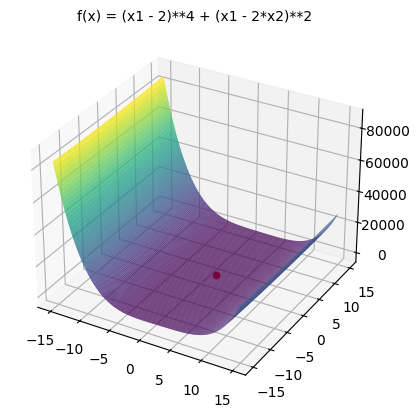

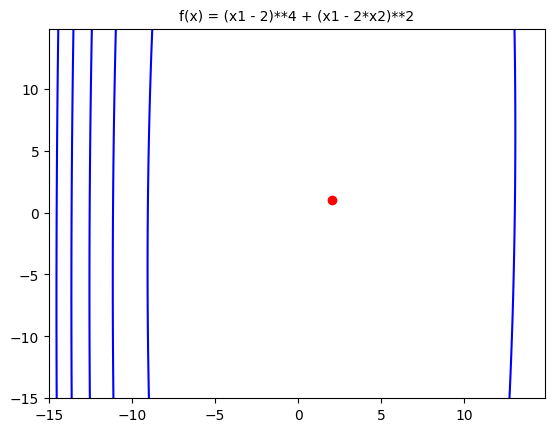

In [232]:
def hookeJeeves(function, initialValue, dim):
    x1, x2 = initialValue[0], initialValue[1]
    nextValue = np.array(["(x1 + x*d1)", "(x2 + x*d2)"])
    nextFunc = function.replace("x1", nextValue[0]).replace("x2", nextValue[1])

    d = np.array(
        [[1.0,0.0], 
        [0.0,1.0]]
    )

    e = 1e-6
    k = 0
    timeout = 100
    time = 0
    
    while time < timeout:
        start = np.array([x1, x2])
        end = np.array([0, 0])

        for k in range(dim):          
            d1, d2 = d[k][0], d[k][1]

            [x, y] = goldenSectionSearch(nextFunc, x1-10 if k == 0 else x2-10, x1+10 if k == 0 else x2+10, x1, x2, d1, d2)

            x1, x2 = eval(nextValue[0]), eval(nextValue[1])

            print(f'lmbda{k}: {x} => y{k}: [{x1}, {x2}]')

            if k == dim-1:
                end = np.array([x1, x2])

        resultd = end - start

        if LA.norm(resultd) < e:
            break
        
        d1, d2 = resultd[0], resultd[1]

        [x, y] = goldenSectionSearch(nextFunc, x1-10 if k == 0 else x2-10, x1+10 if k == 0 else x2+10, x1, x2, d1, d2)

        x1, x2 = eval(nextValue[0]), eval(nextValue[1])

        print(f'lmbda^{k}: {x} => y3: [{x1}, {x2}] d:[{d1},{d2}]')

        time += 1

    return end
    
function = "(x1 - 2)**4 + (x1 - 2*x2)**2"
initialValue = np.array([0, 3])

min = hookeJeeves(function, initialValue, 2)

print(min)

plot3D(function, min, 15)
plotContour(function, min, 15)